# Movie Ratings Explorer

###### Author: Visura Rodrigo | Dataset: IMDb Top 1000 Movies (imdb_top_1000.csv)

##### --- STEP 0: Install and Load Required Libraries ---

In [2]:
!pip install ipython-sql --quiet
!pip install prettytable==2.0.0 --quiet
!pip install matplotlib seaborn pandas --quiet

In [ ]:
# Load the SQL extension
%load_ext sql

#### --- STEP 1: Load Dataset and Create SQLite Database ---

In [ ]:
# Import necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load CSV into pandas DataFrame
df = pd.read_csv('imdb_top_1000.csv')
print("CSV Loaded - Sample Data:")
display(df.head())

CSV Loaded - Sample Data:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
# Connect to SQLite Database (creates if doesn't exist)
conn = sqlite3.connect('movies.db')

In [13]:
# Create the Movies table (replace if exists)
create_table_query = '''
CREATE TABLE IF NOT EXISTS Movies (
    Series_Title TEXT,
    Released_Year INTEGER,
    Genre TEXT,
    Director TEXT,
    IMDB_Rating REAL,
    No_of_Votes INTEGER,
    Gross REAL,
    Meta_score REAL
);
'''
conn.execute("DROP TABLE IF EXISTS Movies;")  # Clean previous if any
conn.execute(create_table_query)
conn.commit()

In [14]:
# Select only the columns that match the Movies table schema
columns_to_use = ['Series_Title', 'Released_Year', 'Genre', 'Director', 'IMDB_Rating', 'No_of_Votes', 'Gross', 'Meta_score']
df[columns_to_use].to_sql('Movies', conn, if_exists='append', index=False)
print("Data imported into SQLite database.")

Data imported into SQLite database.


In [15]:
# Close connection for now 
conn.close()

#### --- STEP 2: Connect to Database from SQL Magic ---

In [16]:
# Set PrettyTable style to avoid error
%config SqlMagic.style = 'PLAIN_COLUMNS'

In [17]:
# Connect SQL magic to the SQLite database file
%sql sqlite:///movies.db

#### --- STEP 3: Exploratory Analysis SQL ---

In [18]:
# Top 10 Highest Rated Movies
print("Top 10 Highest Rated Movies:")
%sql SELECT Series_Title AS Title, Released_Year AS Year, IMDB_Rating AS Rating FROM Movies ORDER BY IMDB_Rating DESC LIMIT 10;

Top 10 Highest Rated Movies:
 * sqlite:///movies.db
Done.


Title,Year,Rating
The Shawshank Redemption,1994,9.3
The Godfather,1972,9.2
The Dark Knight,2008,9.0
The Godfather: Part II,1974,9.0
12 Angry Men,1957,9.0
The Lord of the Rings: The Return of the King,2003,8.9
Pulp Fiction,1994,8.9
Schindler's List,1993,8.9
Inception,2010,8.8
Fight Club,1999,8.8


In [19]:
# Number of Movies per Genre
print("\nCounts of Movies per Genre (top 10):")
%sql SELECT Genre, COUNT(*) AS MovieCount FROM Movies GROUP BY Genre ORDER BY MovieCount DESC LIMIT 10;


Counts of Movies per Genre (top 10):
 * sqlite:///movies.db
Done.


Genre,MovieCount
Drama,85
"Drama, Romance",37
"Comedy, Drama",35
"Comedy, Drama, Romance",31
"Action, Crime, Drama",30
"Crime, Drama, Thriller",28
"Biography, Drama, History",28
"Crime, Drama, Mystery",27
"Crime, Drama",26
"Animation, Adventure, Comedy",24


In [20]:
# Movies Released After 2010 with Rating > 8.0
print("\nHighly Rated Movies Released After 2010:")
%sql SELECT Series_Title AS Title, Released_Year AS Year, IMDB_Rating AS Rating FROM Movies WHERE Released_Year > 2010 AND IMDB_Rating > 8.0 ORDER BY IMDB_Rating DESC LIMIT 10;


Highly Rated Movies Released After 2010:
 * sqlite:///movies.db
Done.


Title,Year,Rating
Hamilton,2020,8.6
Gisaengchung,2019,8.6
Soorarai Pottru,2020,8.6
Interstellar,2014,8.6
Joker,2019,8.5
Whiplash,2014,8.5
The Intouchables,2011,8.5
Capharnaüm,2018,8.4
Ayla: The Daughter of War,2017,8.4
Vikram Vedha,2017,8.4


In [21]:
# Top 10 Directors by Number of Movies
print("\nTop 10 Directors by Number of Movies:")
%sql SELECT Director, COUNT(*) AS NumberOfMovies FROM Movies GROUP BY Director ORDER BY NumberOfMovies DESC LIMIT 10;


Top 10 Directors by Number of Movies:
 * sqlite:///movies.db
Done.


Director,NumberOfMovies
Alfred Hitchcock,14
Steven Spielberg,13
Hayao Miyazaki,11
Martin Scorsese,10
Akira Kurosawa,10
Woody Allen,9
Stanley Kubrick,9
Billy Wilder,9
Quentin Tarantino,8
David Fincher,8


In [51]:
#Average rating and revenue by genre 
print("\nAverage IMDb Rating and Gross Revenue by Genre:")
%sql SELECT Genre,ROUND(AVG(IMDB_Rating),2) AS Avg_Rating,ROUND(AVG(Gross),2) AS Avg_Revenue,COUNT(*) AS Movie_Count FROM Movies WHERE Gross IS NOT NULL GROUP BY Genre ORDER BY Avg_Rating DESC;



Average IMDb Rating and Gross Revenue by Genre:
 * sqlite:///movies.db
Done.


Genre,Avg_Rating,Avg_Revenue,Movie_Count
"Horror, Sci-Fi",8.4,78.0,1
"Crime, Mystery, Thriller",8.4,25.5,2
"Action, Sci-Fi",8.4,137.67,3
Western,8.35,14.25,4
"Drama, Mystery, War",8.35,44.5,2
"Mystery, Romance, Thriller",8.3,3.0,1
"Crime, Drama, Sci-Fi",8.3,6.0,1
"Crime, Drama, Music",8.3,1.0,1
"Comedy, Musical, Romance",8.3,8.0,1
"Adventure, Mystery, Thriller",8.3,13.0,1


In [52]:
#Directors with highest average movie rating (min 5 movies)
print("\nDirectors with Highest Average Movie Rating (Minimum 5 Movies):")
%sql SELECT Director, ROUND(AVG(IMDB_Rating), 2) AS Avg_Rating, COUNT(*) AS Movie_Count FROM Movies GROUP BY Director HAVING Movie_Count >= 5 ORDER BY Avg_Rating DESC LIMIT 10;


Directors with Highest Average Movie Rating (Minimum 5 Movies):
 * sqlite:///movies.db
Done.


Director,Avg_Rating,Movie_Count
Christopher Nolan,8.46,8
Peter Jackson,8.4,5
Francis Ford Coppola,8.4,5
Charles Chaplin,8.33,6
Sergio Leone,8.27,6
Stanley Kubrick,8.23,9
Akira Kurosawa,8.22,10
Quentin Tarantino,8.18,8
Martin Scorsese,8.17,10
Ingmar Bergman,8.14,7


#### --- STEP 4: Python Data Analysis & Visualization ---

C:\Users\a12u\AppData\Local\Temp\ipykernel_28008\1307119191.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


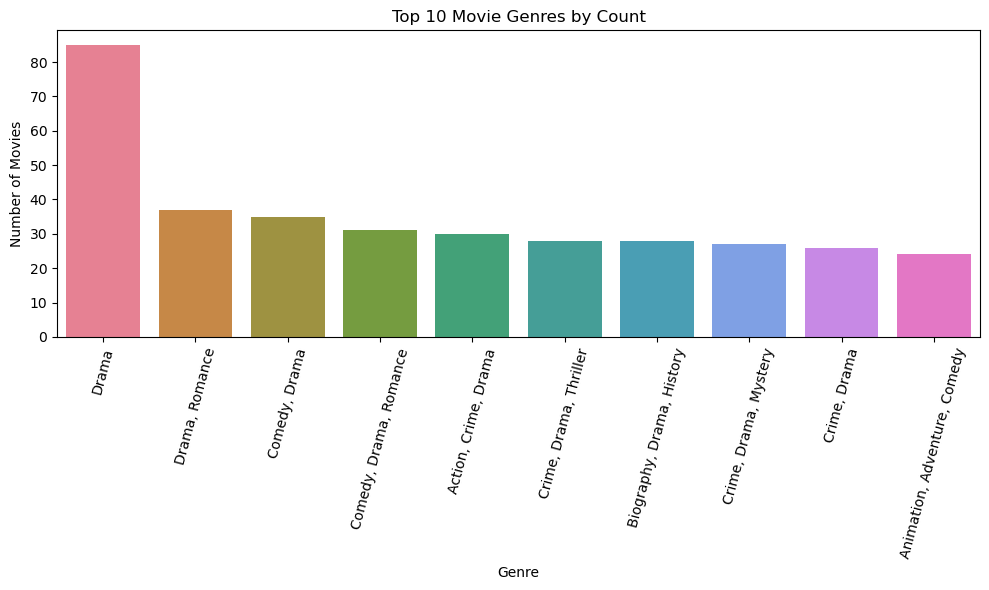

In [25]:
# Read top genres data to visualize
genre_df = pd.read_sql_query('''
SELECT Genre, COUNT(*) AS MovieCount
FROM Movies
GROUP BY Genre
ORDER BY MovieCount DESC
LIMIT 10;
''', conn)

# Bar plot for movie counts by genre
plt.figure(figsize=(10,6))
sns.barplot(
    data=genre_df,
    x='Genre',
    y='MovieCount',
    palette=sns.color_palette('husl', n_colors=len(genre_df))
)
plt.title('Top 10 Movie Genres by Count')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

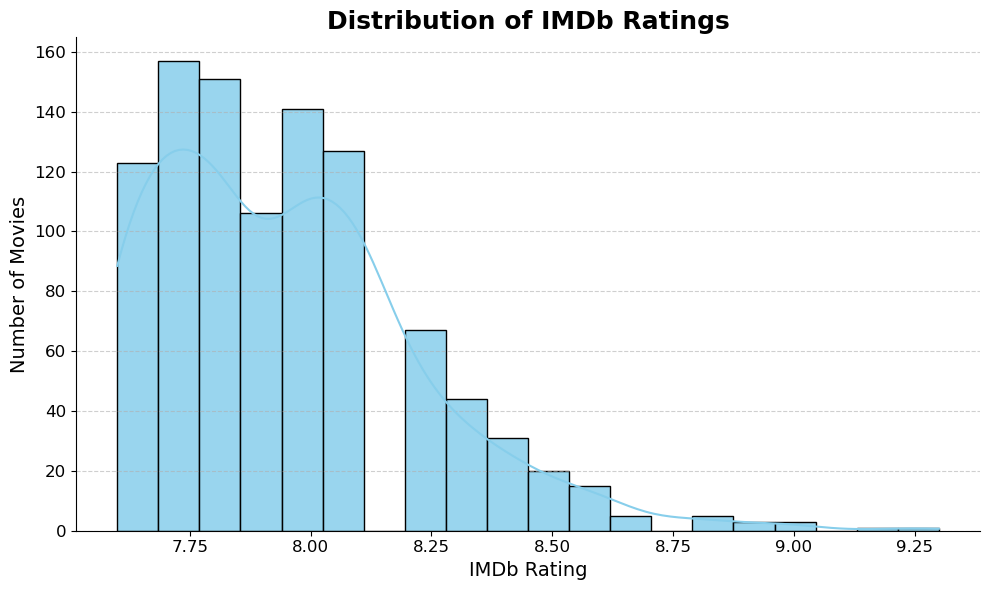

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df['IMDB_Rating'],
    bins=20,
    kde=True,
    color='skyblue',
    edgecolor='black',
    alpha=0.85,
)
plt.title('Distribution of IMDb Ratings', fontsize=18, fontweight='bold')
plt.xlabel('IMDb Rating', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


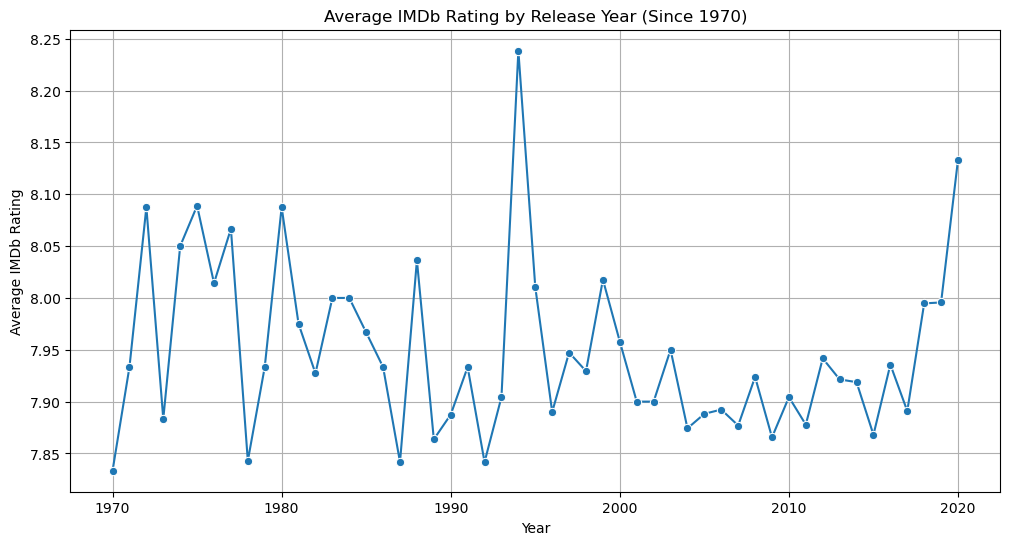

In [39]:
# Average IMDb Rating by Release Year (last 50 years)
avg_rating_year_df = pd.read_sql_query('''
SELECT Released_Year, AVG(IMDB_Rating) AS AvgRating
FROM Movies
WHERE Released_Year >= 1970
GROUP BY Released_Year
ORDER BY Released_Year;
''', conn)

# Filter out non-numeric years (e.g., "PG")
avg_rating_year_df_clean = avg_rating_year_df[avg_rating_year_df['Released_Year'].apply(lambda x: str(x).isdigit())].copy()
avg_rating_year_df_clean['Released_Year'] = avg_rating_year_df_clean['Released_Year'].astype(int)

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rating_year_df_clean, x='Released_Year', y='AvgRating', marker='o')
plt.title('Average IMDb Rating by Release Year (Since 1970)')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()